In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx


Cargamos el DataSet

In [2]:
df=pd.read_csv('Airbnb_limpio_v2.csv')

In [3]:
df.head()

,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,is_available
0,1,111,40.64749,-73.97237,0,2,2,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0,1
1,2,130,40.75362,-73.98377,0,1,0,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0,1
2,2,97,40.80902,-73.94190,1,0,2,2005.0,620.0,124.0,3.0,0.0,0.74,5.0,1.0,352.0,1
3,1,42,40.68514,-73.95976,1,1,0,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0,1
4,2,62,40.79851,-73.94399,0,1,0,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102091 entries, 0 to 102090
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood group             102091 non-null  int64  
 1   neighbourhood                   102091 non-null  int64  
 2   lat                             102091 non-null  float64
 3   long                            102091 non-null  float64
 4   instant_bookable                102091 non-null  int64  
 5   cancellation_policy             102091 non-null  int64  
 6   room type                       102091 non-null  int64  
 7   Construction year               102091 non-null  float64
 8   price                           102091 non-null  float64
 9   service fee                     102091 non-null  float64
 10  minimum nights                  102091 non-null  float64
 11  number of reviews               102091 non-null  float64
 12  reviews per mont

Exploramos los Datos

Como vemos todos tienen la misma cantidad de filas

In [5]:
df.count()

neighbourhood group               102091
neighbourhood                     102091
lat                               102091
long                              102091
instant_bookable                  102091
cancellation_policy               102091
room type                         102091
Construction year                 102091
price                             102091
service fee                       102091
minimum nights                    102091
number of reviews                 102091
reviews per month                 102091
review rate number                102091
calculated host listings count    102091
availability 365                  102091
is_available                      102091
dtype: int64

In [6]:
df.describe()

,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,is_available
count,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000,102091.000000
mean,1.687122,108.371551,40.728085,-73.949622,0.497341,1.000245,0.974023,2012.485694,625.299987,125.028514,7.853738,27.377115,1.275430,3.279114,7.915115,139.993045,0.769833
std,0.763349,69.523230,0.055868,0.049530,0.499995,0.815194,1.031254,5.759069,331.276188,66.238244,17.039993,49.319563,1.620872,1.282658,32.153950,133.186587,0.420942
min,0.000000,0.000000,40.499790,-74.249840,0.000000,0.000000,0.000000,2003.000000,50.000000,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,52.000000,40.688730,-73.982560,0.000000,0.000000,0.000000,2008.000000,341.000000,68.000000,2.000000,1.000000,0.280000,2.000000,1.000000,4.000000,1.000000
50%,2.000000,97.000000,40.722280,-73.954430,0.000000,1.000000,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000,1.000000
75%,2.000000,178.000000,40.762770,-73.932320,1.000000,2.000000,2.000000,2017.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000,1.000000
max,4.000000,223.000000,40.916970,-73.705220,1.000000,2.000000,3.000000,2022.000000,1200.000000,240.000000,365.000000,1024.000000,90.000000,5.000000,332.000000,365.000000,1.000000


Vemos Categorias existentes en neighbourhood group, instant_bookable, cancellation_policy, room type
y graficos 

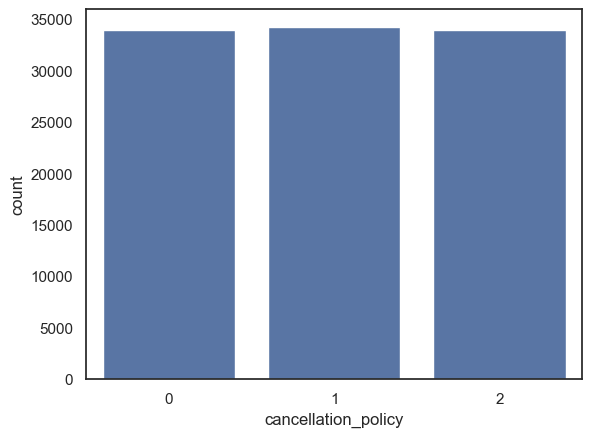

In [7]:
#cancellation_policy
sns.set(style="white")
sns.countplot(x="cancellation_policy", data=df)
plt.show()

#flexible= 0, moderate= 1, strict= 2

In [8]:
#room type
df.groupby(['room type']).size()

room type
0    53425
1      114
2    46331
3     2221
dtype: int64

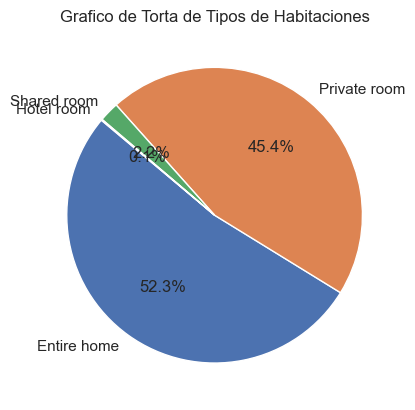

In [9]:
mapeo_categorias = {0: 'Entire home', 1: 'Hotel room', 2: 'Private room', 3: 'Shared room'}

#room type
valores=df['room type']
valores_nombres=valores.map(mapeo_categorias)

frecuencia_tipo=valores_nombres.value_counts()

plt.pie(frecuencia_tipo, labels=frecuencia_tipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Grafico de Torta de Tipos de Habitaciones')
plt.show()

Distribucion de precios y tarifas

Text(0.5, 1.0, 'Precio')

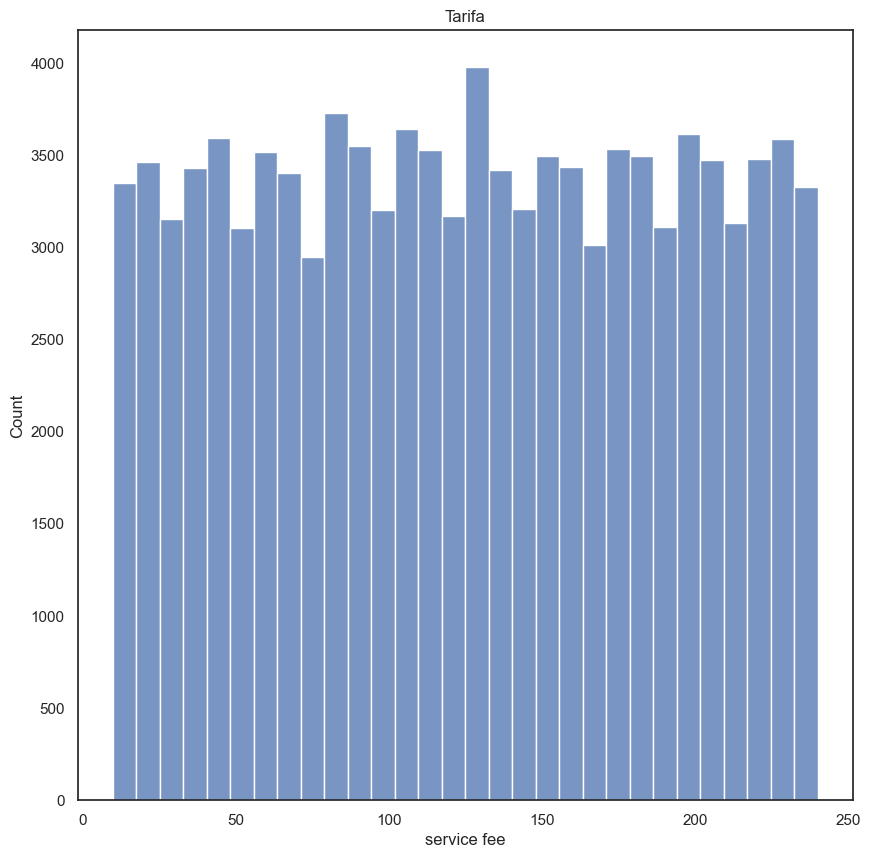

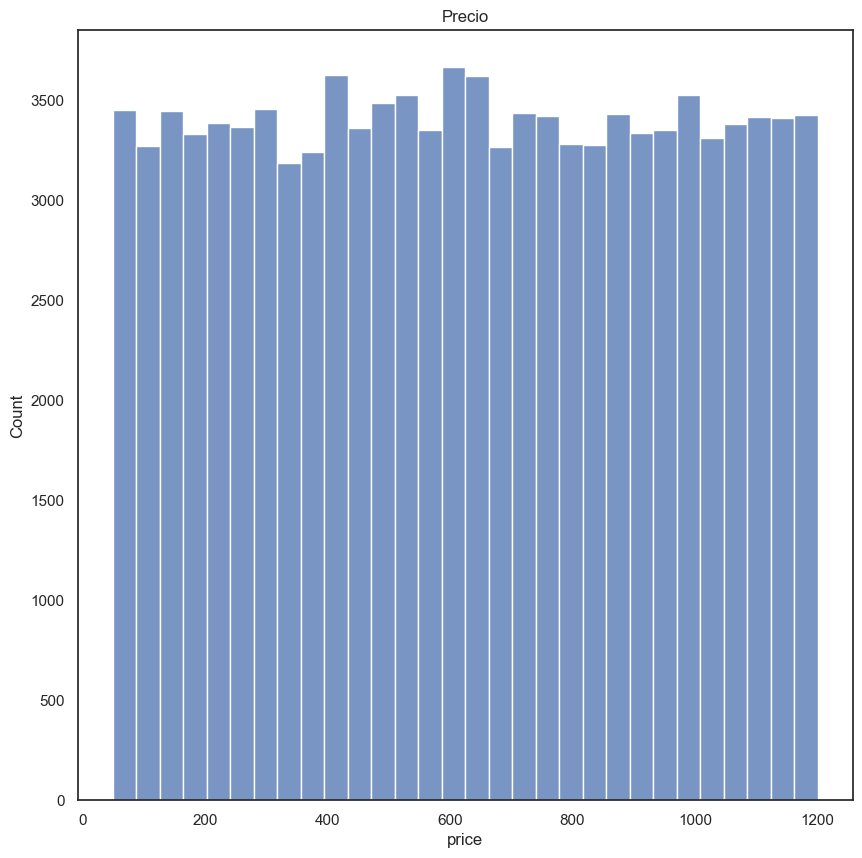

In [10]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['service fee'], bins=30).set_title('Tarifa')
fig = plt.figure(figsize=(10,10))
sns.histplot(df['price'], bins=30).set_title('Precio')

Fecha de construccion

Text(0.5, 1.0, 'Construction year')

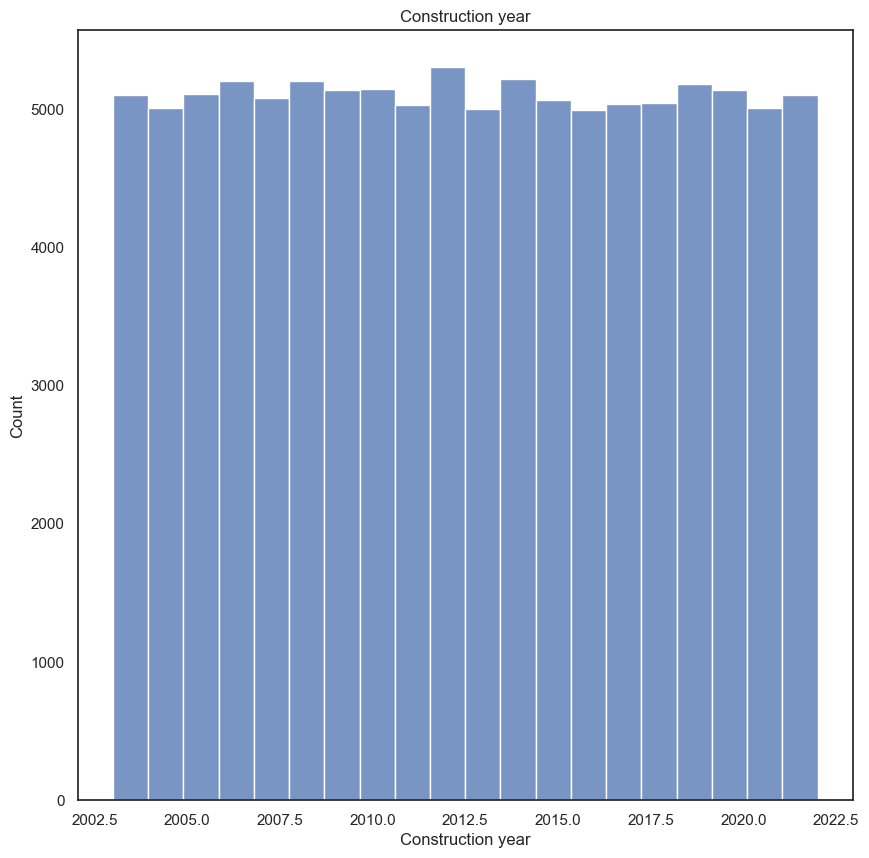

In [11]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['Construction year'], bins=20).set_title('Construction year')

Distribucion de noches minimas y disponibilidad 365

Text(0.5, 1.0, 'Disponibilidad 365 dias al año')

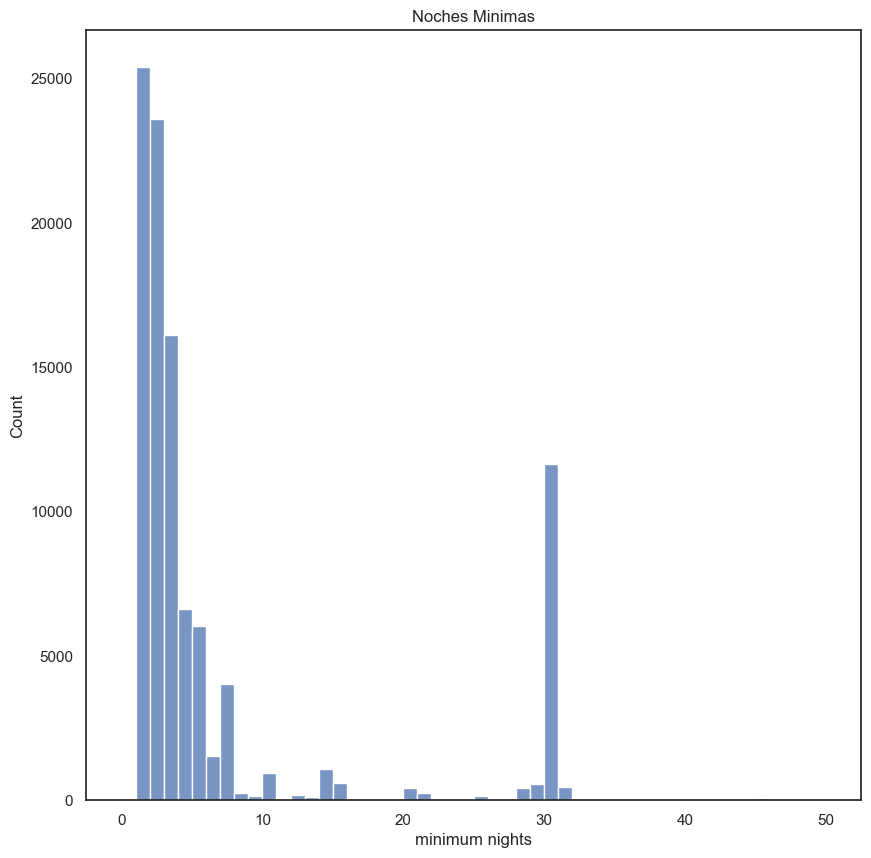

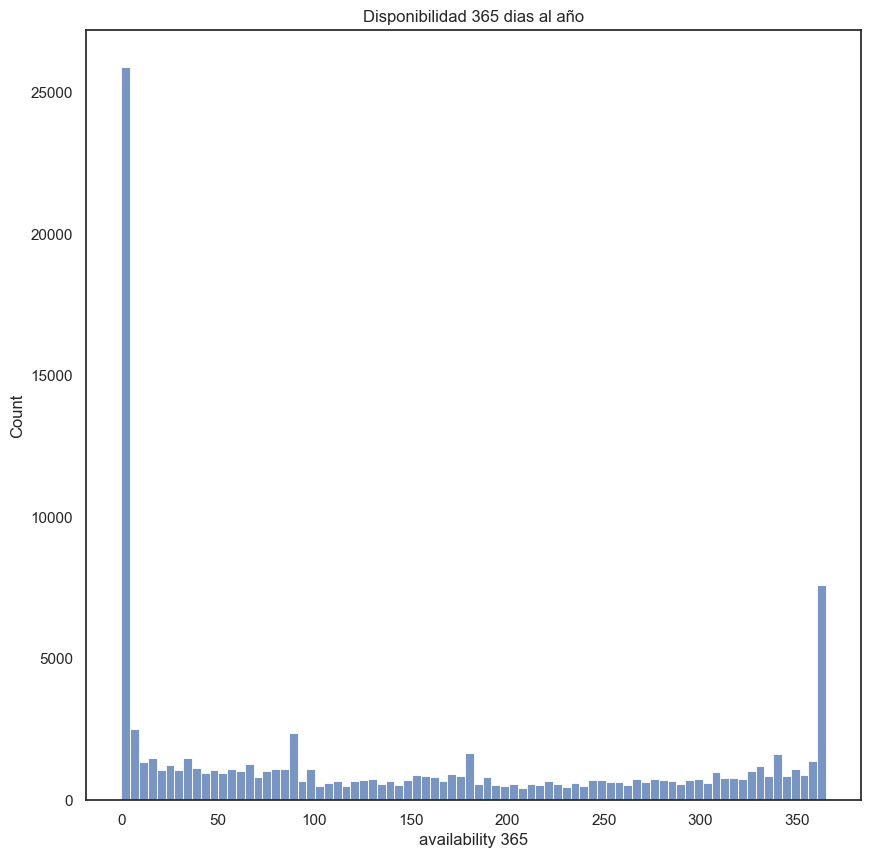

In [12]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['minimum nights'], binrange=(0,50), binwidth=1).set_title('Noches Minimas')
fig = plt.figure(figsize=(10,10))
sns.histplot(df['availability 365'], bins=80).set_title('Disponibilidad 365 dias al año')

Analizamos el numero de reviews, puntuacion y numero de reviews al mes

Text(0.5, 1.0, 'puntuacion')

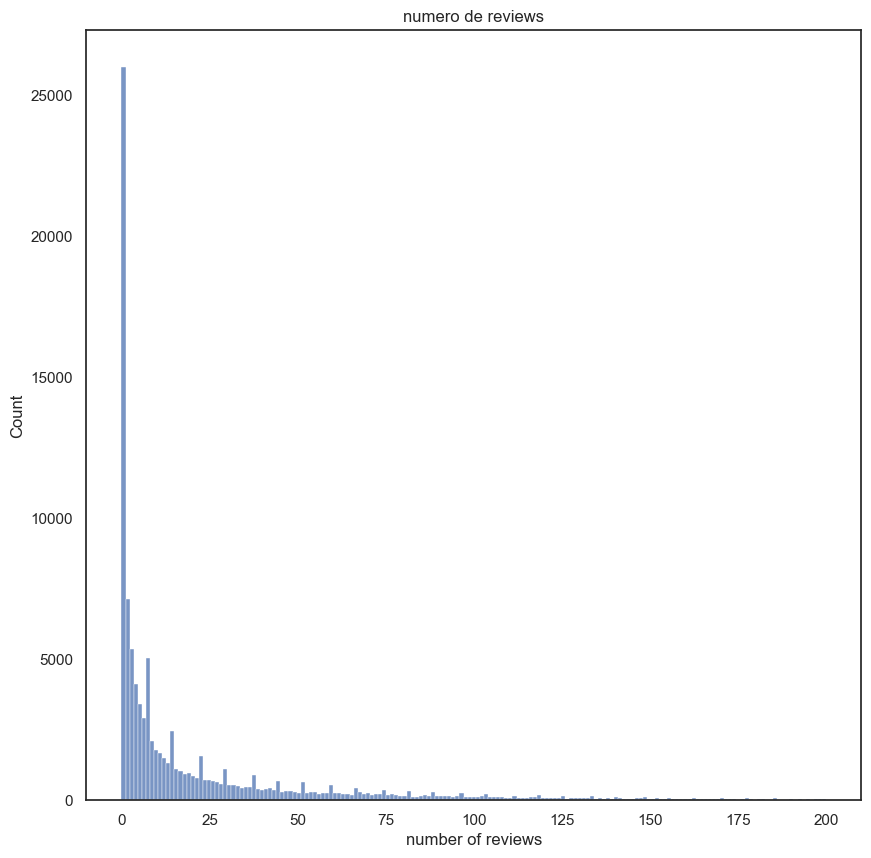

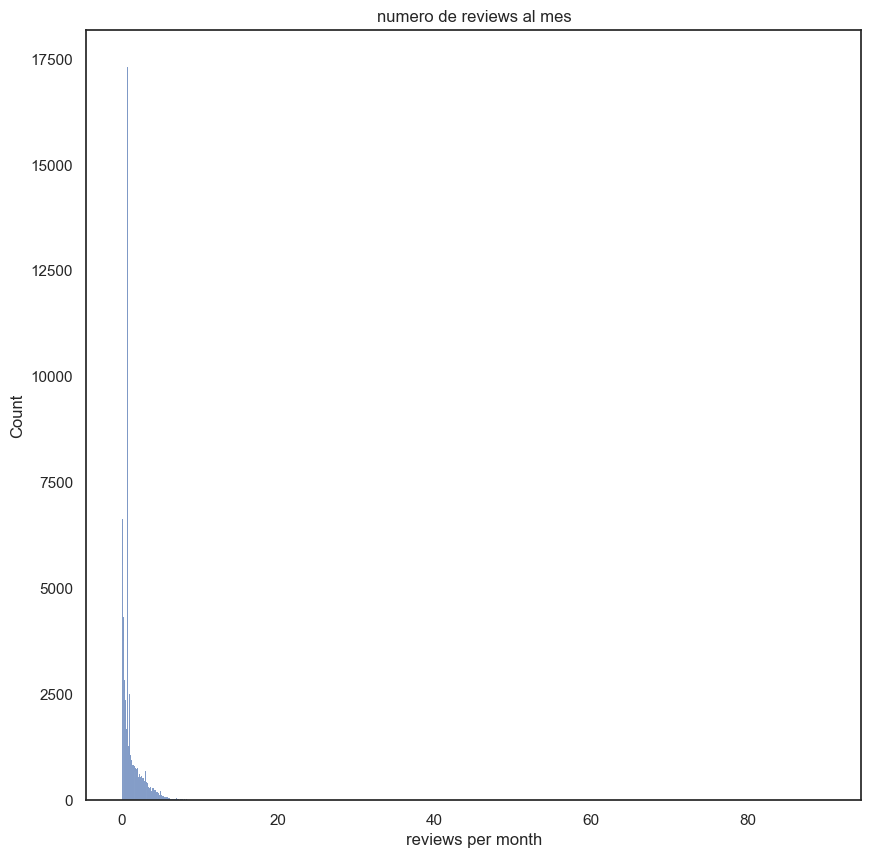

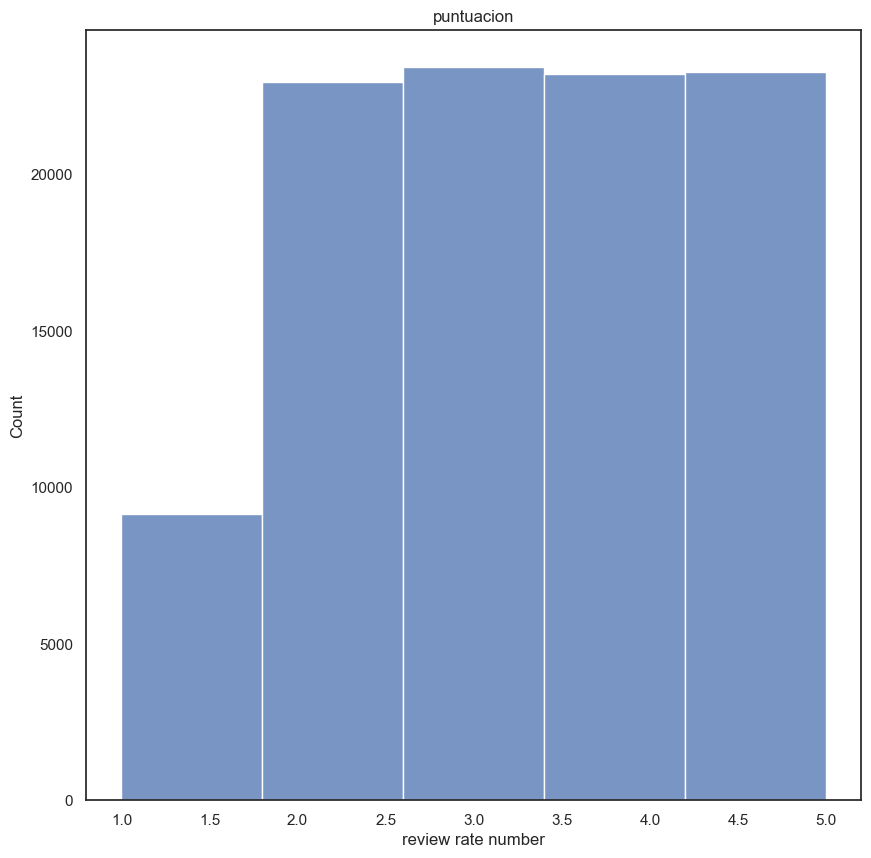

In [13]:
fig = plt.figure(figsize=(10,10))
sns.histplot(df['number of reviews'], binrange=(0,200)).set_title('numero de reviews')
fig = plt.figure(figsize=(10,10))
sns.histplot(df['reviews per month'], binrange=(0,90)).set_title('numero de reviews al mes')
fig = plt.figure(figsize=(10,10))
sns.histplot(df['review rate number'], bins=5).set_title('puntuacion')

Analizamos los grupos de barrios ya que 

In [14]:
#neighbourhood group
df.groupby(['neighbourhood group']).size()

neighbourhood group
0     2703
1    41652
2    43571
3    13214
4      951
dtype: int64

Para una mejor visualizacion le asignamos nombres a las categorias
y visualizamos el porcentaje de alquileres que tiene cada grupo

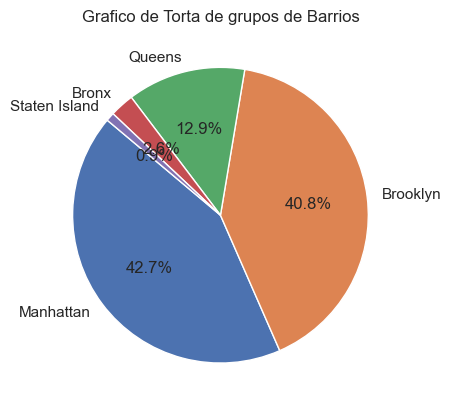

In [15]:
mapeo_categorias = {0:'Bronx', 1:'Brooklyn', 2:'Manhattan', 3:'Queens', 4:'Staten Island'}


valores=df['neighbourhood group']
valores_nombres=valores.map(mapeo_categorias)

frecuencia_grupo=valores_nombres.value_counts()

plt.pie(frecuencia_grupo, labels=frecuencia_grupo.index, autopct='%1.1f%%', startangle=140)
plt.title('Grafico de Torta de grupos de Barrios')
plt.show()

Visualizamos la localizacion de los alquileres

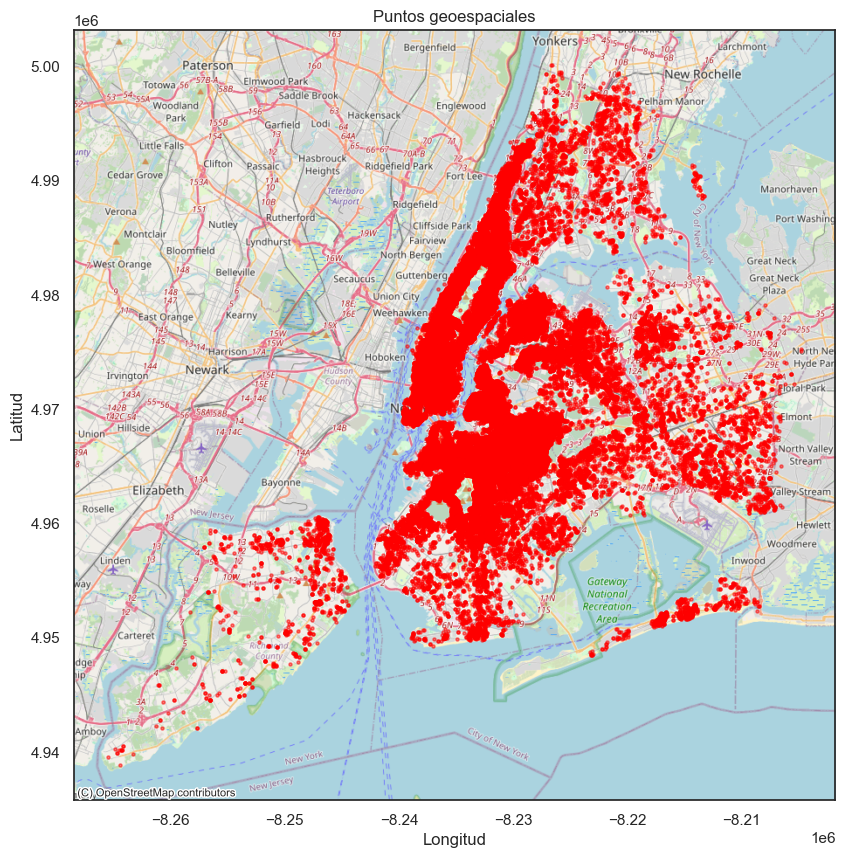

In [16]:
# Crear una columna de geometría a partir de latitud y longitud
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Definir el sistema de referencia espacial (CRS)
gdf.set_crs(epsg=4326, inplace=True)

# Convertir a CRS de Mercator
gdf = gdf.to_crs(epsg=3857)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el GeoDataFrame
gdf.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Agregar un mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar la visualización
plt.title('Puntos geoespaciales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Analizamos la correlacion de las categorias

In [17]:
# df=df.drop(columns=['price'], axis=1)
# df.info()

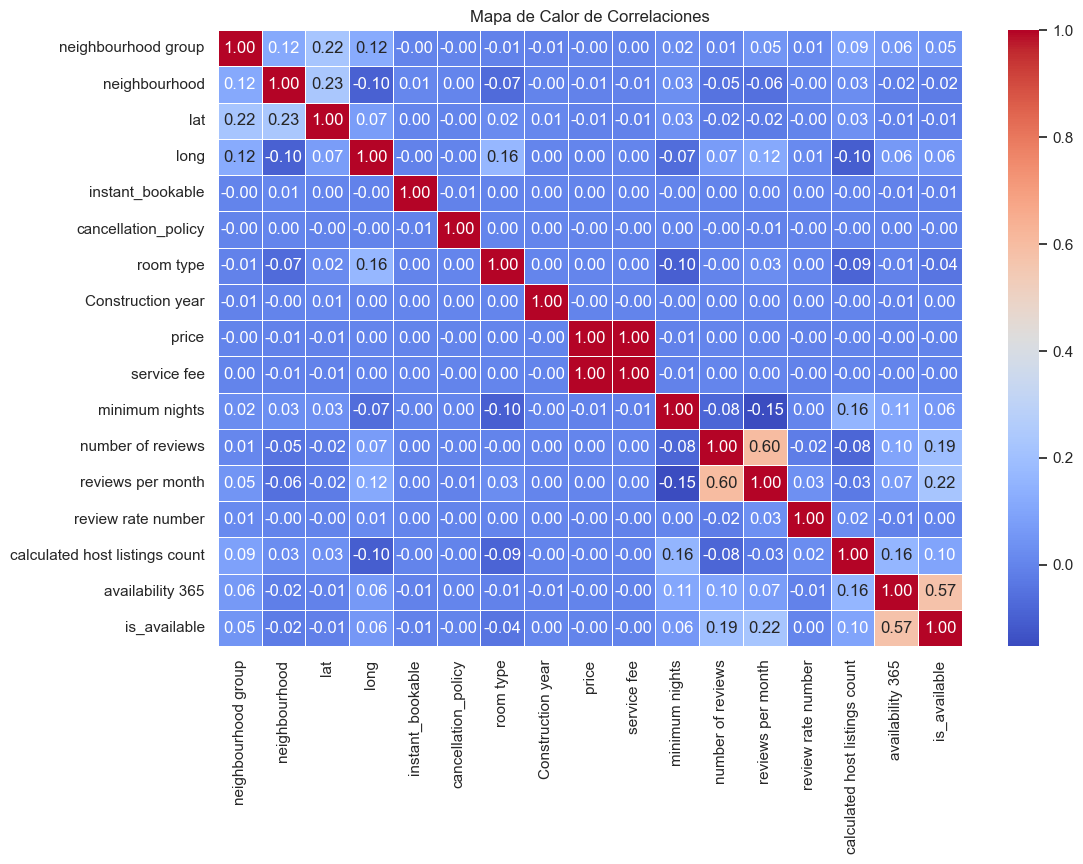

In [18]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Interpretacion de los resultados:

-Price y Service Fee: Hay una correlacion de 0.99 esto indica una fuerte correlación positiva: cuando el precio del alquiler aumenta, es probable que también aumente la tarifa de servicio. Como vamos a querer predecir el precio de los alquileres, la tarifa de servicio sera muy importante para realizarlo.

-NUmber of reviews y Reviews per month: Da un valor de 0.60. Esto sugiere que hay una relación positiva. Los listados con más reseñas totales también tienden a recibir más reseñas mensuales.

-Availability 365 y Minimum Nights: Una correlación positiva de 0.16 indica que no hay una fuerte correlacion positiva entre ambas columnas.

-Minimun nights y Reviews per month: el valor es -0.15. Indica una leve correlacion negativa donde al aumentar las mpches minimas disminuyen levemente el numero de reviews por mes.

Eliminamos los valores extremos

In [19]:
df_sinextremos=df.copy()

# Función para eliminar outliers basada en IQR
def remove_outliers(df_sinextremos, column):
    Q1 = df_sinextremos[column].quantile(0.10)
    Q3 = df_sinextremos[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_sinextremos[(df_sinextremos[column] >= lower_bound) & (df_sinextremos[column] <= upper_bound)]

# Aplicar la función a cada columna
columns = ['availability 365', 'minimum nights', 'number of reviews', 'reviews per month']
for column in columns:
    df_sinextremos = remove_outliers(df_sinextremos, column)

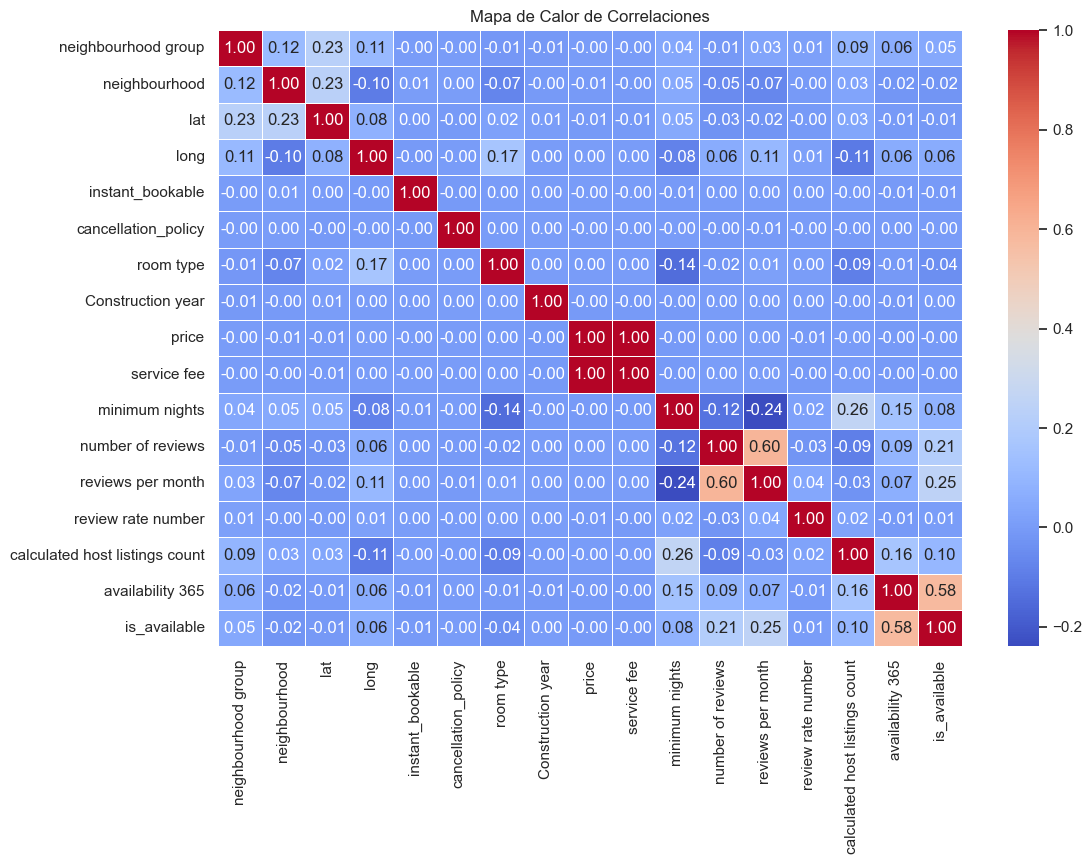

In [20]:
# Calcular la matriz de correlación
corr_matrix = df_sinextremos.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [21]:
# sns.pairplot(
#     data=df,
#     vars=['price', 'service fee', 'number of reviews'],
     
#     markers='.')